In [2]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import ast
import seaborn as sns

#loading data
df = pd.read_csv("data_jobs.csv")

#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter for Kenya 

In [3]:
df_Kenya = df[df['job_country'] == 'Kenya']
df_Kenya
                 

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1059,Cloud Engineer,Navigation & Infrastructure Engineer,"Nairobi, Kenya",via Trabajo.org,Full-time,False,Kenya,2023-08-06 13:50:21,False,False,Kenya,NaN,NaN,NaN,Kenya Airways,NaN,NaN
1705,Data Analyst,"Data Analytics Program Manager, VisionFund Int...","Nairobi, Kenya",via MyJobMag,Full-time,False,Kenya,2023-02-09 13:40:24,False,False,Kenya,NaN,NaN,NaN,World Vision Kenya,[tableau],{'analyst_tools': ['tableau']}
2089,Data Scientist,Data Scientist,"Nairobi, Kenya",via Trabajo.org,Full-time,False,Kenya,2023-05-25 13:39:11,False,False,Kenya,NaN,NaN,NaN,Medtronic Labs,"[go, python, aws, docker]","{'cloud': ['aws'], 'other': ['docker'], 'progr..."
2279,Data Scientist,Director of Data,Kenya,via Trabajo.org,Full-time,False,Kenya,2023-05-25 13:39:14,True,False,Kenya,NaN,NaN,NaN,KOKO NETWORKS,NaN,NaN
3482,Data Analyst,Data Analyst,"Nairobi, Kenya",via UNjobnet,Full-time,False,Kenya,2023-03-22 13:47:56,False,False,Kenya,NaN,NaN,NaN,United Nations Human Settlements Programme,[c],{'programming': ['c']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783724,Data Scientist,Data Science Intern at Dataposit,"Nairobi, Kenya",via BeBee Kenya,Full-time and Internship,False,Kenya,2023-09-18 06:19:21,False,False,Kenya,NaN,NaN,NaN,Dataposit,"[r, python, matlab, java, c]","{'programming': ['r', 'python', 'matlab', 'jav..."
784558,Cloud Engineer,Data Insights Analytics Cloud Support Engineer,"Nairobi, Kenya",via BrighterMonday,Full-time,False,Kenya,2023-11-16 06:31:16,False,False,Kenya,NaN,NaN,NaN,confidential,"[python, r, ruby, ruby, go, java, c#, javascri...","{'cloud': ['aws', 'redshift', 'oracle'], 'data..."
784798,Senior Data Scientist,Senior Analyst,"Nairobi, Kenya",via BeBee Kenya,Full-time,False,Kenya,2023-10-29 06:22:25,False,False,Kenya,NaN,NaN,NaN,Habitat for Humanity International,"[sas, sas, r, tableau]","{'analyst_tools': ['sas', 'tableau'], 'program..."
784991,Cloud Engineer,Senior Engineering Technician,"Nairobi, Kenya",via Trabajo.org,Full-time,False,Kenya,2023-08-12 06:19:49,True,False,Kenya,NaN,NaN,NaN,Kenya Marine and Fisheries Research Institute ...,[c],{'programming': ['c']}


## Explode Skills

Converts the `job_skills` column from string representations of lists into actual list objects and then expands these lists so each skill appears in its own row. It then displays the `job_title` and `job_skills` columns, allowing us to analyze the distribution of skills across different data job titles.

In [4]:
df_skills = df_Kenya.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
1059,Navigation & Infrastructure Engineer,NaN
1705,"Data Analytics Program Manager, VisionFund Int...",tableau
2089,Data Scientist,go
2089,Data Scientist,python
2089,Data Scientist,aws
...,...,...
785115,Data Analyst.,python
785115,Data Analyst.,r
785115,Data Analyst.,excel
785115,Data Analyst.,tableau


## Count Skills per Job Title

Groups DataFrame by `job_skills` and `job_title_short`, counting the occurrences of each skill within each job title. Then resets the index of the Series to turn it back into a DataFrame and renames the series holding the count to 'count'. The final DataFrame, `df_skills_count`, shows the frequency of each skill with each job title.

In [5]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
150,excel,Data Analyst,190
601,sql,Data Analyst,182
476,r,Data Analyst,164
455,python,Data Analyst,164
462,python,Software Engineer,139
...,...,...,...
695,vue.js,Cloud Engineer,1
412,perl,Data Analyst,1
7,alteryx,Business Analyst,1
55,bigquery,Machine Learning Engineer,1


## Create List of Top 3 Roles

#### Focus: Data Analysts, Data Engineers, and Data Scientists

Filter the job titles based on the most popular.

In [6]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Scientist', 'Software Engineer']

## Plot Skill Counts

Creates a stacked horizontal bar chart for the top 5 skills for Top 3 roles, displaying the frequency of each skill. 

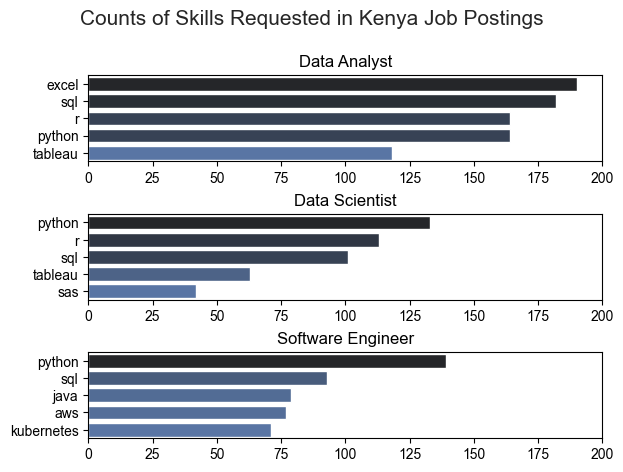

In [7]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 200) # make the scales the same

fig.suptitle('Counts of Skills Requested in Kenya Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

## Convert Counts to Percentages

#### Focus: Counts don't show what portions of jobs are requesting these skills

So we'll convert the counts into percentages which helps us understand how each job title represents relative to the entire dataset. 

Before we can calculate the percentages we need the total counts for the jobs posted by job title. Calculate the frequency of each job title using the `value_counts()` method on the `job_title_short` column. Then reset the index to transform the Series into a DataFrame and renames the columns to `job_title_short` and `total`. The DataFrame `df_job_title_count` now holds a list of job titles alongside their total occurrences.

In [9]:
# Use original df to get the count of job titles
df_job_title_count = df_Kenya['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,548
1,Software Engineer,314
2,Data Scientist,242
3,Business Analyst,217
4,Data Engineer,174
5,Cloud Engineer,56
6,Senior Data Analyst,52
7,Senior Data Scientist,46
8,Senior Data Engineer,37
9,Machine Learning Engineer,19


Then we calculate the percentages. First merge `df_skills_count` and `df_job_title_count`, based on the 'job_title_short' column, ensuring each skill count is associated with the total number of job postings for that title. Then calculate the percentage of each skill within its job title by dividing the skill count by the total job postings and multiplying by 100, adding this new data as a 'percentage' column. 

In [10]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,excel,Data Analyst,190,548,34.671533
1,sql,Data Analyst,182,548,33.211679
2,r,Data Analyst,164,548,29.927007
3,python,Data Analyst,164,548,29.927007
4,python,Software Engineer,139,314,44.267516
...,...,...,...,...,...
711,vue.js,Cloud Engineer,1,56,1.785714
712,perl,Data Analyst,1,548,0.182482
713,alteryx,Business Analyst,1,217,0.460829
714,bigquery,Machine Learning Engineer,1,19,5.263158


## Plot Percentage Count

Filters and sorts a DataFrame to get the top 5 skills percentages for these top 3 roles. After sorting the skills by descending percentage, reverse the order of these top 5 entries to use in a horizontal bar plot, which by default starts plotting from the bottom.

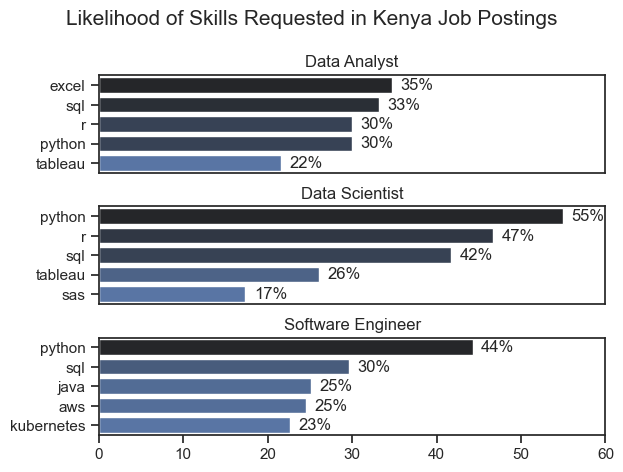

In [11]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 60)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in Kenya Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()